# Scatter plots & Correlations

In [1]:
import json
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 22 }
plt.rc('font', **font)

### Course: CA116, Year: 2016/2017

In [3]:
_course = 'ca116'
_academic_year = (2016, 2017)

In [4]:
filename = '../../data/features/features_%s_%s.json' % (_course.upper(), _academic_year[1])

with open(filename) as f:
    features = json.load(f)

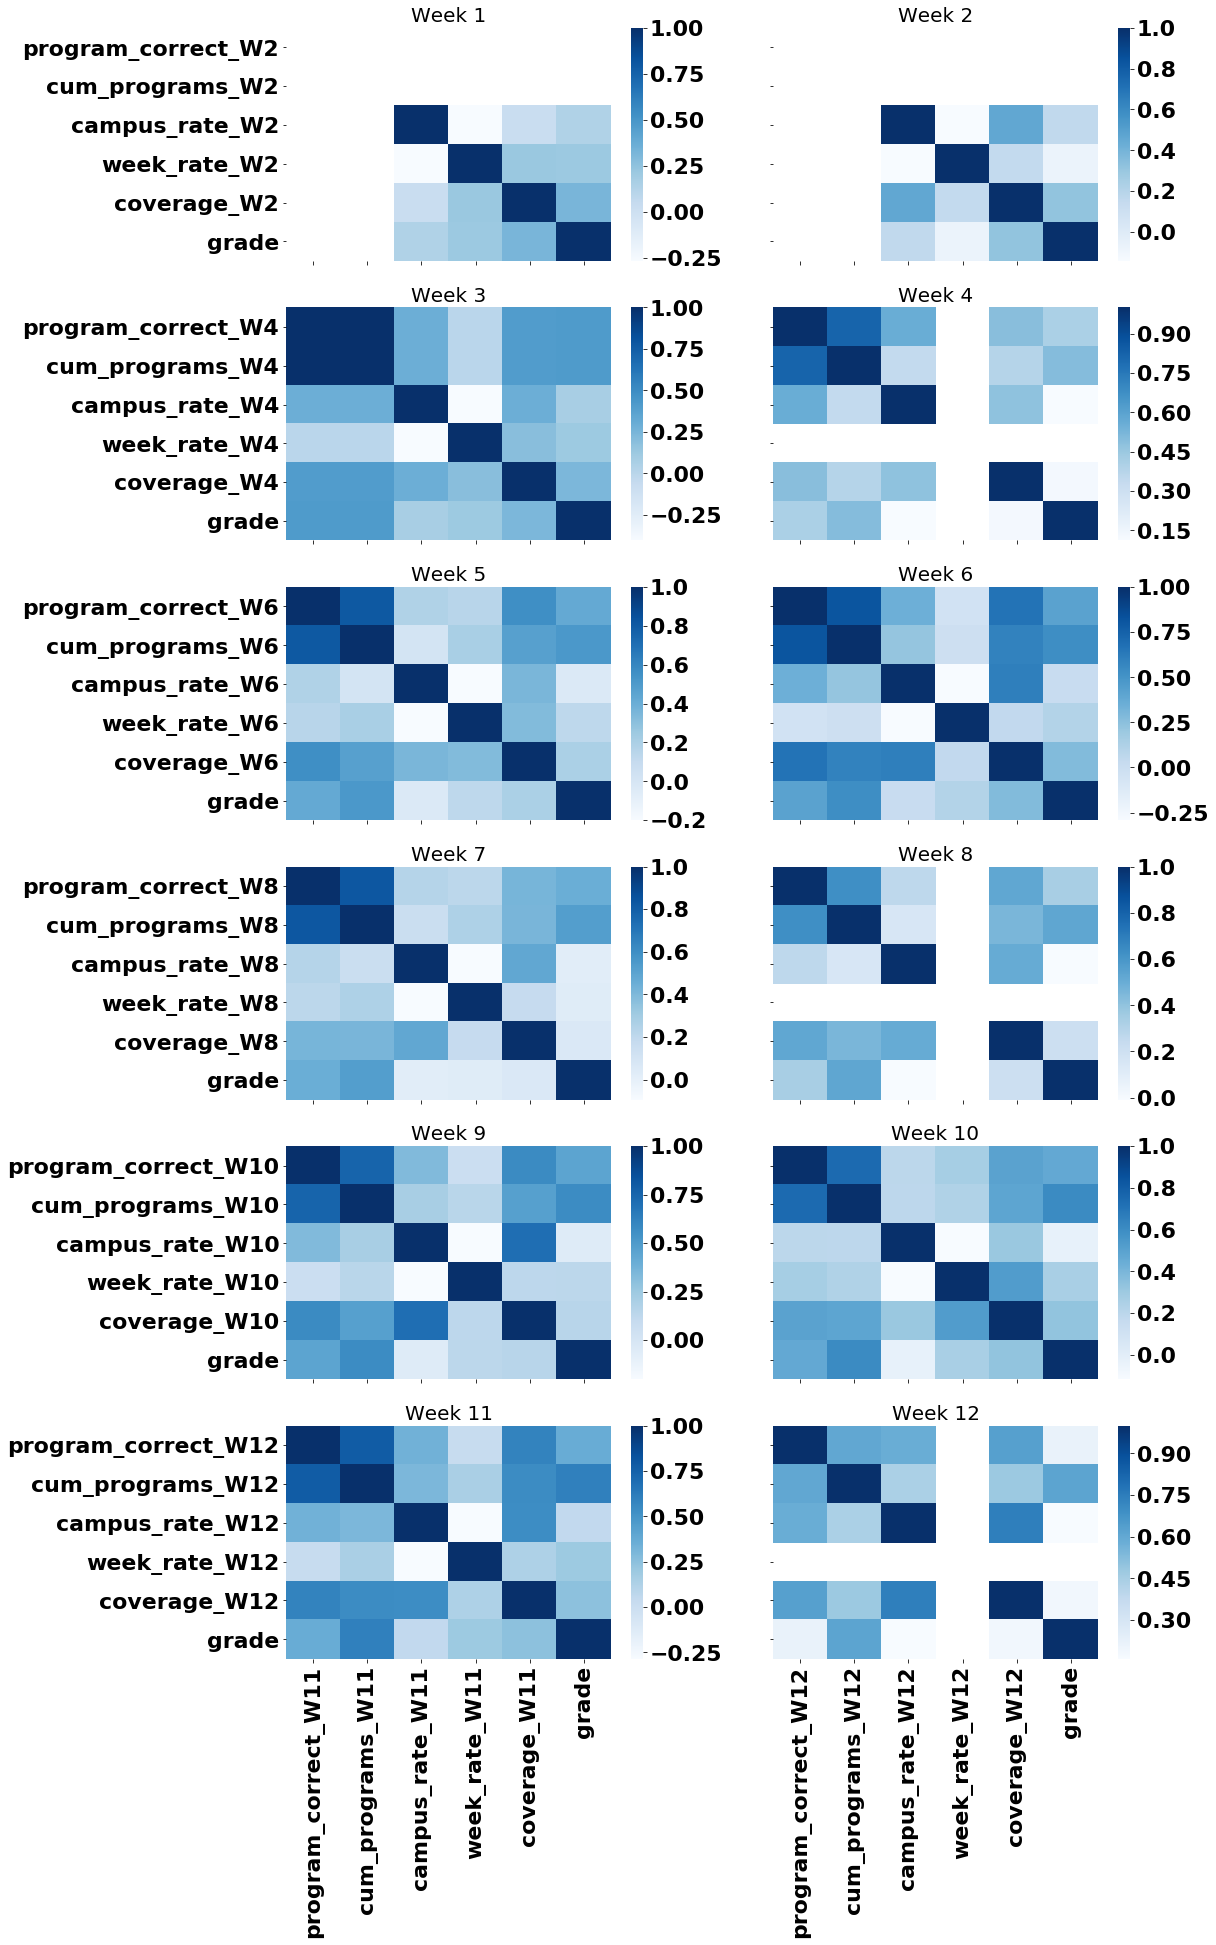

In [5]:
f, axarr = plt.subplots(6, 2, sharex='col', sharey='row', figsize=(16, 30)) # 12 figures
plt.title('Feature Correlations')

for i in range(12):
    
    # Week
    week = i + 1
    # Plot
    r = i // 2 # row to plot
    c = i % 2 # column to plot
    
    # Weekly data
    week_data = [d for d in features if d['week'] == week]
    
    # Column names
    col_names = week_data[0].keys()
    
    # Feature names
    week_name = 'W{}'.format(week)
    feature_names = [ col for col in col_names if week_name in col ]
    feature_names.append('grade')
    
    # Dataframe
    df = pd.DataFrame(week_data)
    axarr[r, c].set_title('Week {}'.format(week), fontsize=20)
    cor = df[feature_names].corr()
    sns.heatmap(cor, annot=False, cmap=plt.cm.Blues, ax=axarr[r, c])
    
plt.savefig('../../figures/correlations_{}_{}_{}.png'.format(_course.upper(), _academic_year[0], _academic_year[1]), 
                                                                bbox_inches="tight")

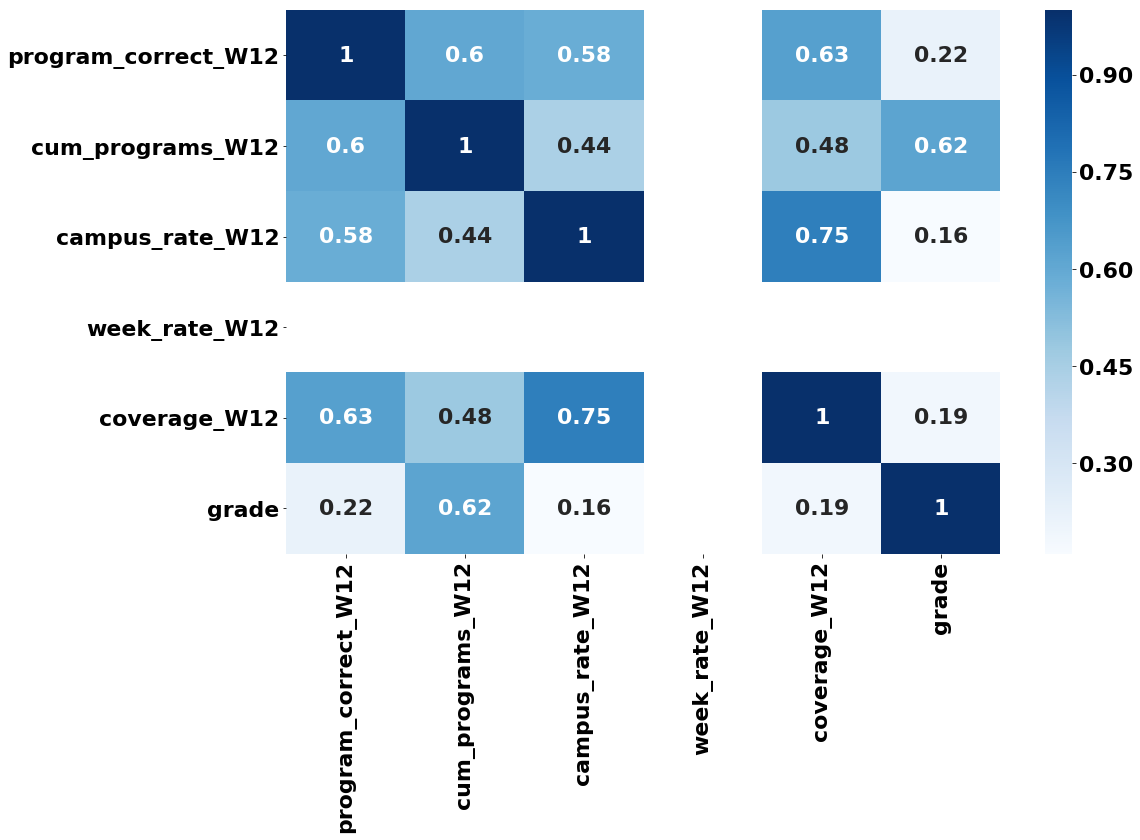

In [6]:
plt.figure(figsize=(16, 10))
# plt.title('Feature Correlations Week {}'.format(week), fontsize=25)
cor = df[feature_names].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.savefig('../../figures/correlations_{}_{}_{}_Week_12.png'.format(
    _course.upper(), _academic_year[0], _academic_year[1]), bbox_inches="tight")

In [7]:
def calculate_correlations(x, y, feature):
    """
    Calculate correlations
    :param x: First set of random variables
    :param y: Second set of random variables
    :param feature: Feature name
    :return: Message with Pearson and Spearman correlation results
    """
    # http://www.statsoft.com/Textbook/Statistics-Glossary/P/button/p#Pearson%20Correlation
    # http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr
    p = stats.pearsonr(x, y)
    pearson_msg = "Pearson Correlation: %s, p-value %s" % (round(p[0], 4), p[1])
    # http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
    sp = stats.spearmanr(x, y)
    spearman_msg = "Spearman Correlation: %s, p-value %s" % (round(sp[0], 4), sp[1])
    msg = "Correlations for feature: " + str(feature) + "\n" + pearson_msg + "\n" + spearman_msg + "\n"
    return msg

In [8]:
print('***** Week: {} *****'.format(week))
print('Feature names: {}'.format(feature_names))
x = [ d['cum_programs_W{}'.format(week)] for d in week_data ]
y = [ d['grade'] for d in week_data ]
print(calculate_correlations(x, y, 'Cumulative Programs'))

***** Week: 12 *****
Feature names: ['program_correct_W12', 'cum_programs_W12', 'campus_rate_W12', 'week_rate_W12', 'coverage_W12', 'grade']
Correlations for feature: Cumulative Programs
Pearson Correlation: 0.6168, p-value 1.4794369751947865e-14
Spearman Correlation: 0.6188, p-value 1.1380801735297487e-14



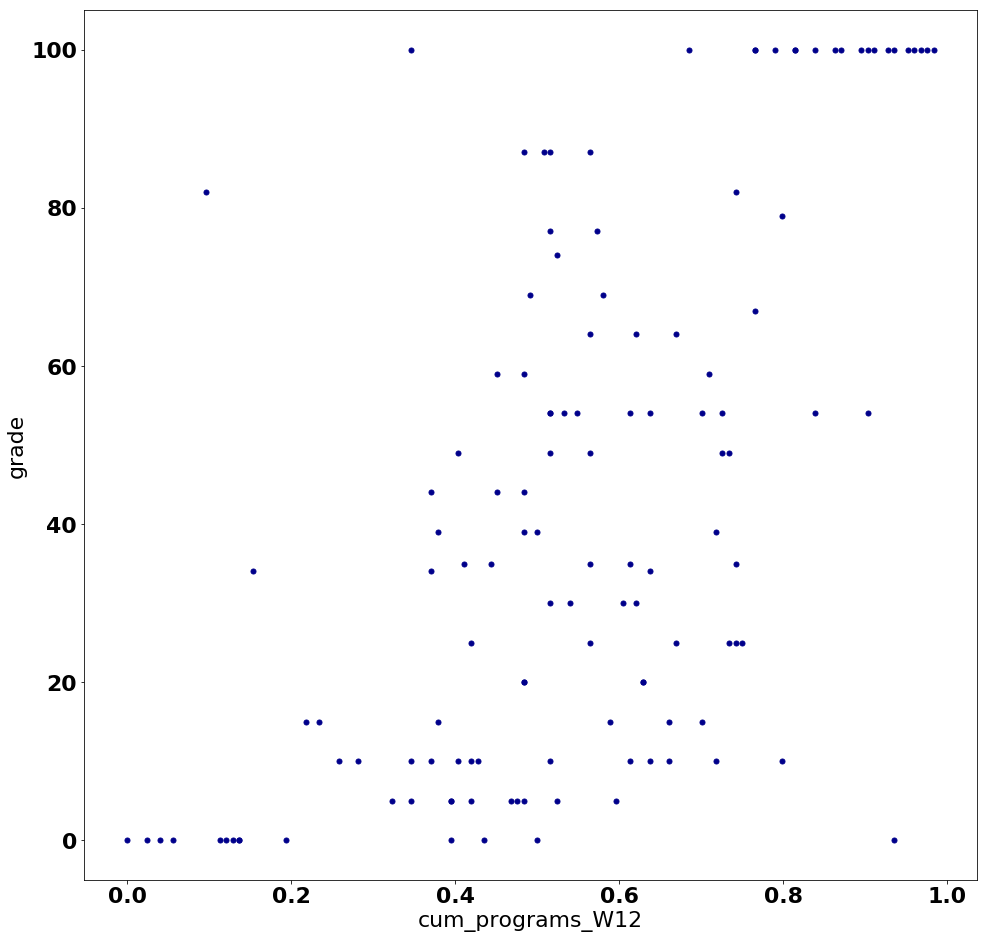

In [9]:
fig = df.plot.scatter(
    x='cum_programs_W12', 
    y='grade', 
    c='DarkBlue', 
    s=25,
    figsize=(16, 16)
)

In [10]:
fig.get_figure().savefig('../../figures/scatter_{}_{}_{}_CUM_PROGRAMS_W12_GRADE.png'.format(
    _course.upper(), _academic_year[0], _academic_year[1]), bbox_inches="tight")

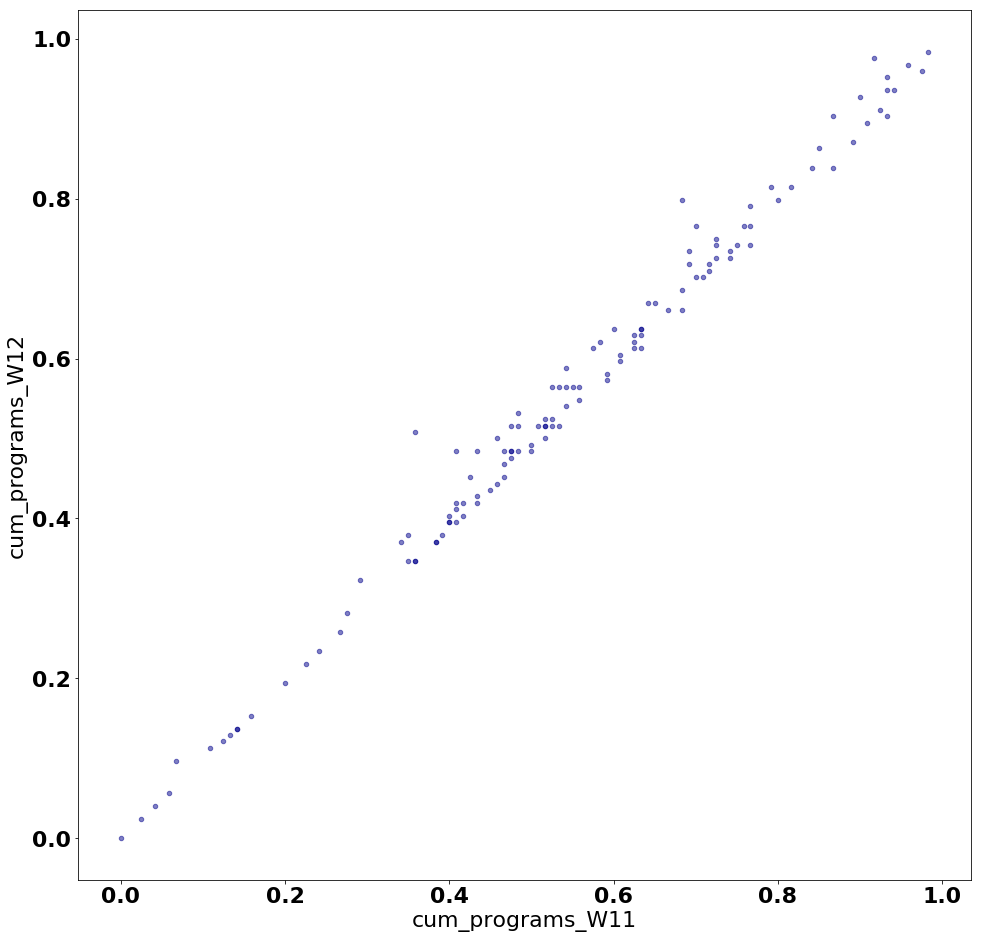

In [11]:
fig = df.plot.scatter(
    x='cum_programs_W11',
    y='cum_programs_W12',
    c='DarkBlue', 
    alpha=0.5,
    figsize=(16, 16)
)

In [12]:
fig.get_figure().savefig('../../figures/scatter_{}_{}_{}_CUM_PROGRAMS_W11_CUM_PROGRAMS_W12.png'.format(
    _course.upper(), _academic_year[0], _academic_year[1]), bbox_inches="tight")